In [3]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.cluster import k_means_elbow_analysis, silhouette_analysis, fit_kmeans
from src.kmeans_feature_imp import KMeansInterp
from sklearn.cluster import KMeans

def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)


## Read in scaled features

In [4]:
df = pd.read_csv("../data/cohort_features_scaled_v2.csv", index_col="ID")
df.head(5)

n_stays  anchor_age  suspected_infection    weight  height_chart  \
ID                                                                     
0       1.0    0.909091                    1 -1.329023     -1.333333   
1       0.0    0.818182                    1 -0.521152      0.333333   
2       0.0    0.181818                    0 -0.922558     -0.466667   
3       0.0   -0.409091                    1  0.986648      0.666667   
4       0.0   -1.000000                    1  0.057344      0.533333   

    heart_rate_min  heart_rate_max  temperature_min  temperature_max  \
ID                                                                     
0         1.045455        0.571429         0.888889         1.000000   
1        -0.500000        1.321429        -0.111111        -0.333333   
2         0.409091        0.428571         2.111111         0.500000   
3         0.545455        0.107143         0.888889         1.111111   
4         0.590909        0.535714         0.444444         0.111111   

    nbpm_min  ...  dopamine  epinephrine  norepinephrine  phenylephrine  \
ID            ...                                                         
0  -1.733333  ...         0            0               1              1   
1  -0.333333  ...         0            0               0              1   
2   0.933333  ...         0            0               0              0   
3   0.333333  ...         0            0               0              0   
4   1.533333  ...         0            0               0              0   

    vasopressin  dobutamine  milrinone  albumin  bilirubin  abps  
ID                                                                
0             0           0          0        0          1     1  
1             0           0          0        0          0     1  
2             0           0          0        0          1     1  
3             0           0          0        0          0     0  
4             0           0          0        1          1     1  

[5 rows x 68 columns]

Find clusters, using InterpKmeans, which can be accessed [here](https://github.com/YousefGh/kmeans-feature-importance),  we can further analyse the clusters and attempt to determine which feature is of most importance. K-means feature importance determines which feature was responsible for the highest reduction in the sum of squares of each data points distance to its cluster centroid.  

[111817447.34705187, 16359520.368643342, 6039792.993295944, 2258474.7348519107, 967491.1747772535, 643123.8061157538, 540493.8527392428, 475598.0505497489, 411673.29911453795, 374106.5325713456]
<class 'list'>
               0
1   1.118174e+08
2   1.635952e+07
3   6.039793e+06
4   2.258475e+06
5   9.674912e+05
6   6.431238e+05
7   5.404939e+05
8   4.755981e+05
9   4.116733e+05
10  3.741065e+05


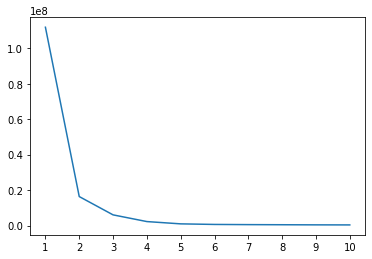

In [8]:
InterpKmeans1 = df.copy()

intradistance = []
for number_of_clusters in range(1, 11): 
    kmeans = KMeansInterp(n_clusters = number_of_clusters,
                          random_state = 42,
                          ordered_feature_names=InterpKmeans1.columns.tolist(),
                          feature_importance_method='wcss_min').fit(InterpKmeans1) 
    intradistance.append(kmeans.inertia_)
print(intradistance)
print(type(intradistance))


## Elbow plot for decision:
ks = [1,2,3,4,5,6,7,8,9,10]
d1  = pd.DataFrame(intradistance,ks)
print(d1)
plt.xticks(ks)
plt.plot(ks, intradistance)


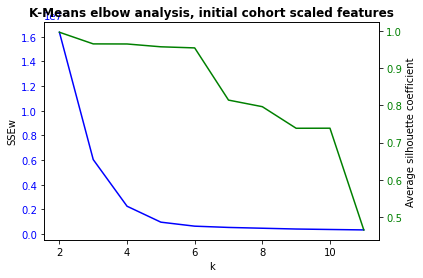

    k         sse_w  silhouette
0   2  1.635952e+07    0.996579
1   3  6.039793e+06    0.965274
2   4  2.258475e+06    0.965033
3   5  9.674912e+05    0.957454
4   6  6.431238e+05    0.954497
5   7  5.404939e+05    0.814214
6   8  4.755981e+05    0.796505
7   9  4.116733e+05    0.738481
8  10  3.741065e+05    0.738665
9  11  3.392303e+05    0.465285


In [9]:
"""
Use the elbow method to determine the "k", number of clusters
"""
# Determine the range of k values to analyse
k_max = 11
k_list = np.linspace(1, k_max, 11, dtype=int)[1:]

k_means_elbow_analysis(
    k_list, InterpKmeans1,
    title=f"K-Means elbow analysis, initial cohort scaled features"
)

Crude visualisation of the above elbow plots yields different results, will use k = 4 based on Johnsons analysis.

In [10]:
kmeans4 = KMeansInterp(n_clusters = 4, random_state = 42, ordered_feature_names=InterpKmeans1.columns.tolist(), feature_importance_method='wcss_min').fit(InterpKmeans1)
clusters = kmeans4.predict(InterpKmeans1)
InterpKmeans1['Cluster'] = clusters
InterpKmeans1

n_stays  anchor_age  suspected_infection    weight  height_chart  \
ID                                                                       
0         1.0    0.909091                    1 -1.329023     -1.333333   
1         0.0    0.818182                    1 -0.521152      0.333333   
2         0.0    0.181818                    0 -0.922558     -0.466667   
3         0.0   -0.409091                    1  0.986648      0.666667   
4         0.0   -1.000000                    1  0.057344      0.533333   
...       ...         ...                  ...       ...           ...   
4643      0.0    0.363636                    1  0.414898     -0.466667   
4644      0.0    1.090909                    0  0.168658     -0.133333   
4645      1.0   -0.363636                    0  0.131553     -0.666667   
4646      1.0    1.000000                    0 -0.651019     -0.866667   
4647      0.0    0.272727                    1  0.172031      0.000000   

      heart_rate_min  heart_rate_max  temperature_min  temperature_max  \
ID                                                                       
0           1.045455        0.571429         0.888889         1.000000   
1          -0.500000        1.321429        -0.111111        -0.333333   
2           0.409091        0.428571         2.111111         0.500000   
3           0.545455        0.107143         0.888889         1.111111   
4           0.590909        0.535714         0.444444         0.111111   
...              ...             ...              ...              ...   
4643       -0.863636       -0.821429       -17.444444        -0.722222   
4644       -0.363636        0.464286         1.777778         0.000000   
4645        0.136364        0.285714        -0.111111        -0.444444   
4646       -0.409091       -0.892857         0.111111        -0.500000   
4647       -1.000000       -0.750000        -0.555556        -0.444444   

      nbpm_min  ...  epinephrine  norepinephrine  phenylephrine  vasopressin  \
ID              ...                                                            
0    -1.733333  ...            0               1              1            0   
1    -0.333333  ...            0               0              1            0   
2     0.933333  ...            0               0              0            0   
3     0.333333  ...            0               0              0            0   
4     1.533333  ...            0               0              0            0   
...        ...  ...          ...             ...            ...          ...   
4643  2.133333  ...            0               0              1            0   
4644 -0.066667  ...            0               0              1            0   
4645 -0.533333  ...            0               0              1            0   
4646 -0.466667  ...            0               0              0            0   
4647 -0.333333  ...            0               0              1            0   

      dobutamine  milrinone  albumin  bilirubin  abps  Cluster  
ID                                                              
0              0          0        0          1     1        1  
1              0          0        0          0     1        1  
2              0          0        0          1     1        1  
3              0          0        0          0     0        1  
4              0          0        1          1     1        1  
...          ...        ...      ...        ...   ...      ...  
4643           0          0        0          0     1        1  
4644           0          0        0          0     1        1  
4645           0          0        0          0     1        1  
4646           0          0        1          1     0        1  
4647           0          0        1          1     1        1  

[4648 rows x 69 columns]

After assigning cluster based on kmeans of raw-data, perform PCA for visualistion in a 2D space.

In [11]:
from sklearn.decomposition import PCA
#plotX4 is copy of the current DataFrame to be plotted:
plotX4 = InterpKmeans1.copy()

#PCA with 2 principal components for a 2-D visualisation:
PCA_2d = PCA(n_components=2)


PCs_2d = pd.DataFrame(PCA_2d.fit_transform(plotX4.drop(['Cluster'], axis=1)))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

plotX4 = pd.concat([plotX4,PCs_2d], axis=1, join='inner')

#Now we divide plotX into 4 new DataFrames.
#Each of these new DataFrames will hold all of the values contained in exacltly one of the clusters.
cluster0 = plotX4[plotX4["Cluster"] == 0]
cluster1 = plotX4[plotX4["Cluster"] == 1]
cluster2 = plotX4[plotX4["Cluster"] == 2]
cluster3 = plotX4[plotX4["Cluster"] == 3]


## Calculate the mean value (Centroids) for each cluster to be seen in the Plot Figure:
centr = [[cluster0["PC1_2d"].mean(), cluster0["PC2_2d"].mean()],
         [cluster1["PC1_2d"].mean(), cluster1["PC2_2d"].mean()],
         [cluster2["PC1_2d"].mean(), cluster2["PC2_2d"].mean()],
         [cluster3["PC1_2d"].mean(), cluster3["PC2_2d"].mean()],
         ]

centr_x = [x for x,y in centr]
centr_y = [y for x,y in centr]

In [12]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as pio
pio.renderers.default = "colab"
enable_plotly_in_cell()

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)
#trace4 is for 'Cluster 3'
trace4 = go.Scatter(
                    x = cluster3["PC1_2d"],
                    y = cluster3["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
                    text = None)

# Include the centroids
centroids = go.Scatter(x = centr_x,
                       y = centr_y,
                      mode = "markers",
                      name = 'centroids',
                      marker = dict(color = 'black'),
                      text = None)

data = [trace1, trace2, trace3, trace4, centroids]

title = "Visualizing Clusters in Two Dimensions Using PCA - 4 Clusters"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig4 = dict(data = data, layout = layout)

iplot(fig4)

K = 4 appears to produce poor clustering. Is it optimal?

In [13]:
assigned_clusters = pd.DataFrame(InterpKmeans1, columns=["Cluster"])
assigned_clusters.value_counts()

Cluster
1          4579
0            67
2             1
3             1
dtype: int64

Very similar clustering counts to those Johnson got in kmeans on raw data and kmeans on pca reduced data.

Analysis of scaled values associated with each cluster

In [14]:
k = 4
InterpKmeans1.head()
InterpKmeans1.groupby('Cluster').describe(percentiles=[]).to_csv(f"../data/cohort_cluster_stats_{k}_kmeansjh.csv")
InterpKmeans1.groupby('Cluster').describe(percentiles=[])

n_stays                                    anchor_age            \
          count      mean       std  min  50%  max      count      mean   
Cluster                                                                   
0          67.0  0.194030  0.434804  0.0  0.0  2.0       67.0 -0.191995   
1        4579.0  0.385674  0.654470  0.0  0.0  6.0     4579.0 -0.075533   
2           1.0  0.000000       NaN  0.0  0.0  0.0        1.0 -1.863636   
3           1.0  0.000000       NaN  0.0  0.0  0.0        1.0 -0.454545   

                             ... bilirubin                   abps            \
              std       min  ...       std  min  50%  max   count      mean   
Cluster                      ...                                              
0        0.758284 -1.818182  ...  0.238721  0.0  1.0  1.0    67.0  0.343284   
1        0.735042 -1.909091  ...  0.460956  0.0  1.0  1.0  4579.0  0.632016   
2             NaN -1.863636  ...       NaN  1.0  1.0  1.0     1.0  1.000000   
3             NaN -0.454545  ...       NaN  1.0  1.0  1.0     1.0  0.000000   

                                  
              std  min  50%  max  
Cluster                           
0        0.478389  0.0  0.0  1.0  
1        0.482310  0.0  1.0  1.0  
2             NaN  1.0  1.0  1.0  
3             NaN  0.0  0.0  0.0  

[4 rows x 408 columns]

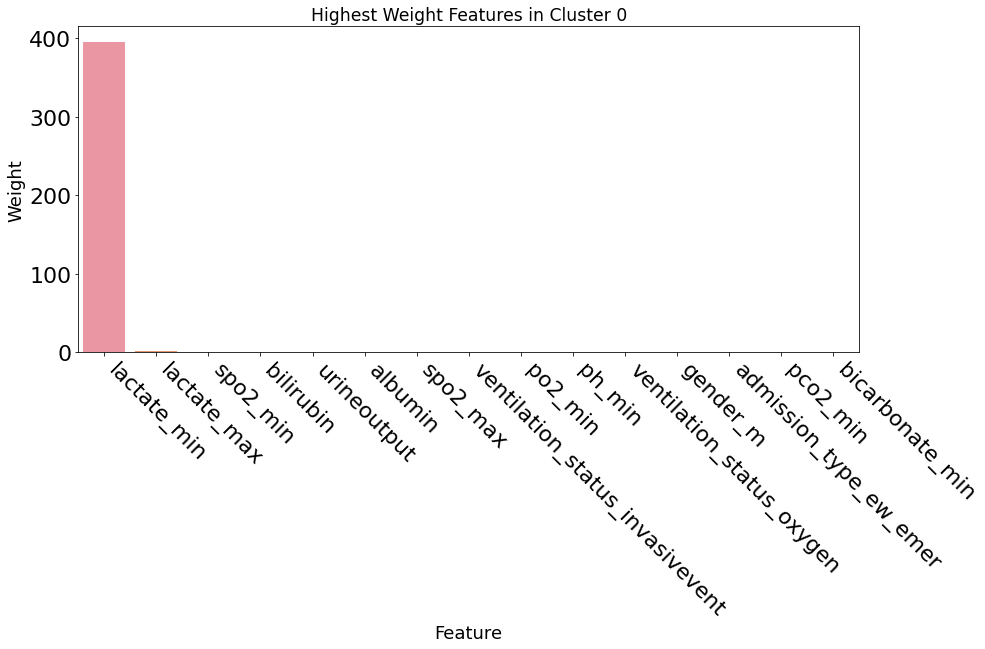

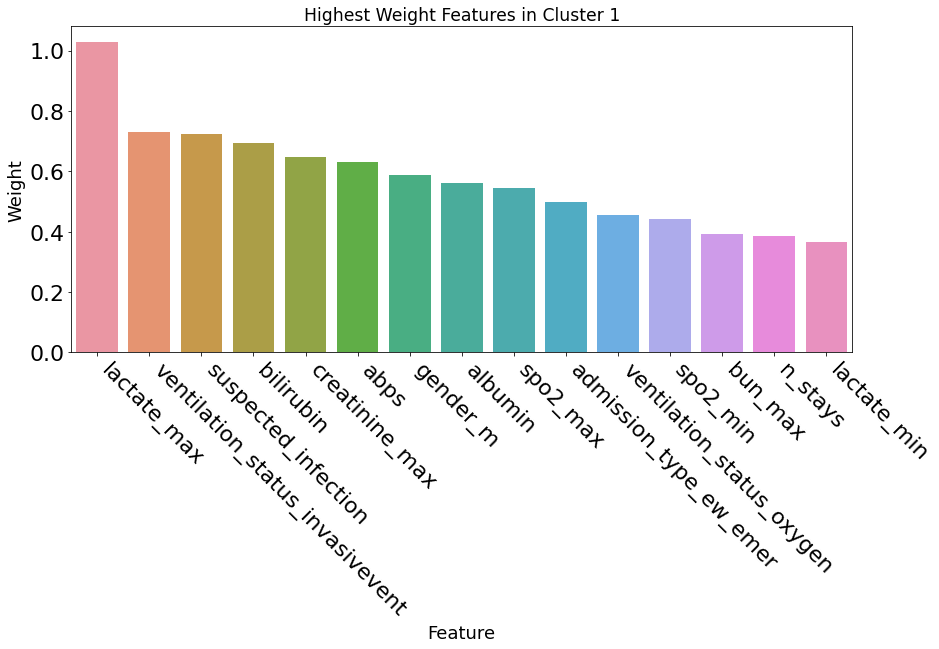

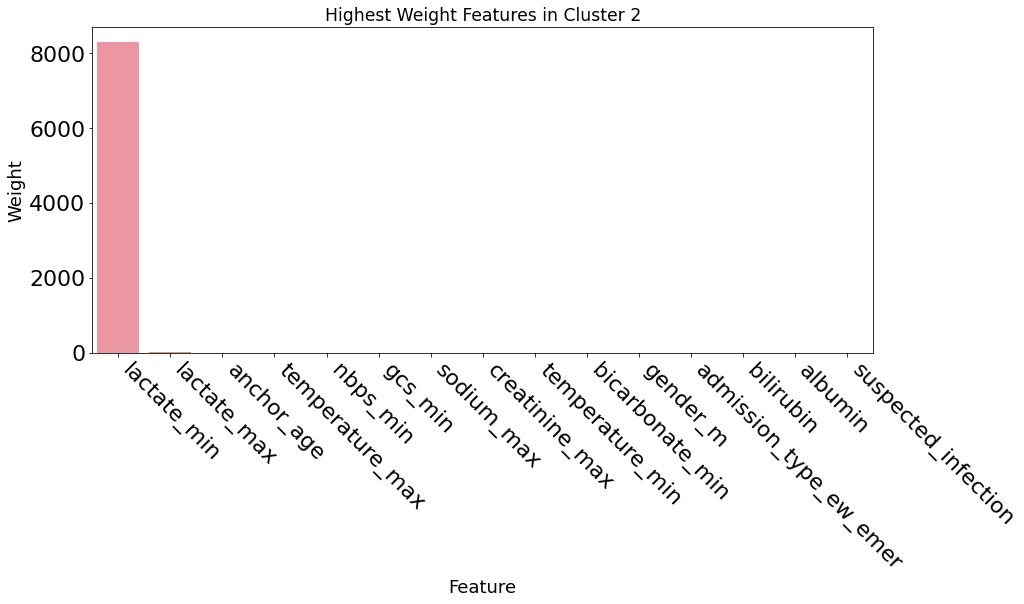

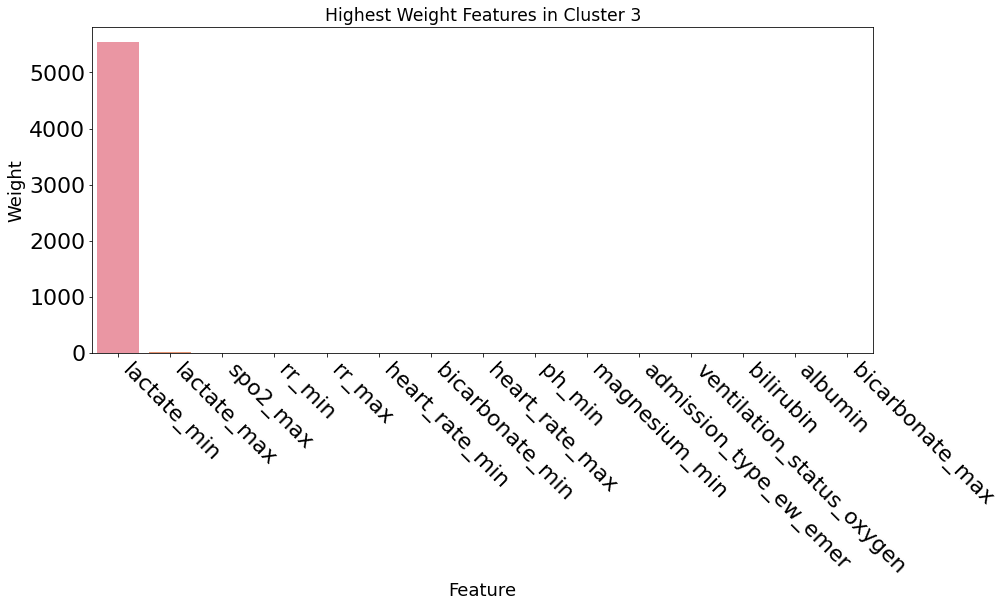

In [15]:
#below code for generating plots based on feature importantance is directly taken from: https://colab.research.google.com/drive/1IpXgVINkBuyOJ1Hg06OHoJf-mXO_C6qc?usp=sharing
import seaborn as sns
for cluster_label, feature_weights in kmeans4.feature_importances_.items():    
    df_feature_weight = pd.DataFrame(feature_weights[:15], columns=["Feature", "Weight"])
    fig, ax = plt.subplots(figsize=(14,6))
    sns.barplot(x="Feature", y="Weight", data=df_feature_weight)
    plt.xticks(rotation=-45, ha="left")
    ax.tick_params(axis='both', which='major', labelsize=22)
    plt.title(f'Highest Weight Features in Cluster {cluster_label}', fontsize='xx-large')
    plt.xlabel('Feature', fontsize=18)
    plt.ylabel('Weight', fontsize=18)

    plt.show()
    
    print('\n\n')

Lactate_min, lactate_max, spO2_min and bilirubin are the most important features in Cluster 0 (COS),

c:\Users\jhoyl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\jhoyl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\jhoyl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\jhoyl\anaconda3\lib\site-packages\seaborn\_decorators.py:3

<AxesSubplot:xlabel='Cluster', ylabel='bilirubin'>

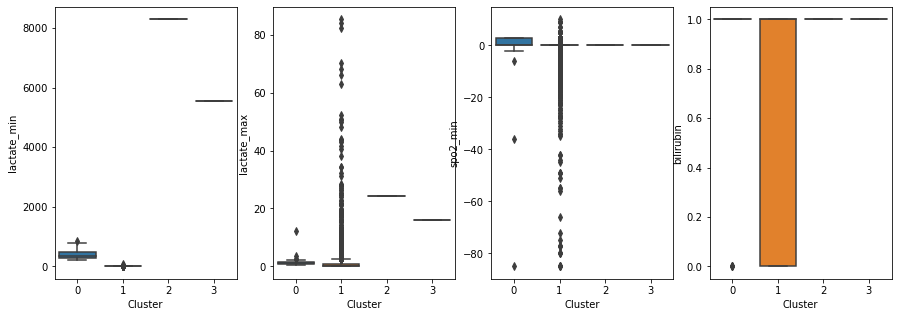

In [16]:
fig, axs = plt.subplots(1,4, figsize=(15,5))
sns.boxplot(InterpKmeans1.Cluster, InterpKmeans1.lactate_min,ax=axs[0])
sns.boxplot(InterpKmeans1.Cluster, InterpKmeans1.lactate_max,ax=axs[1])
sns.boxplot(InterpKmeans1.Cluster, InterpKmeans1.spo2_min,ax=axs[2])
sns.boxplot(InterpKmeans1.Cluster, InterpKmeans1.bilirubin,ax=axs[3])

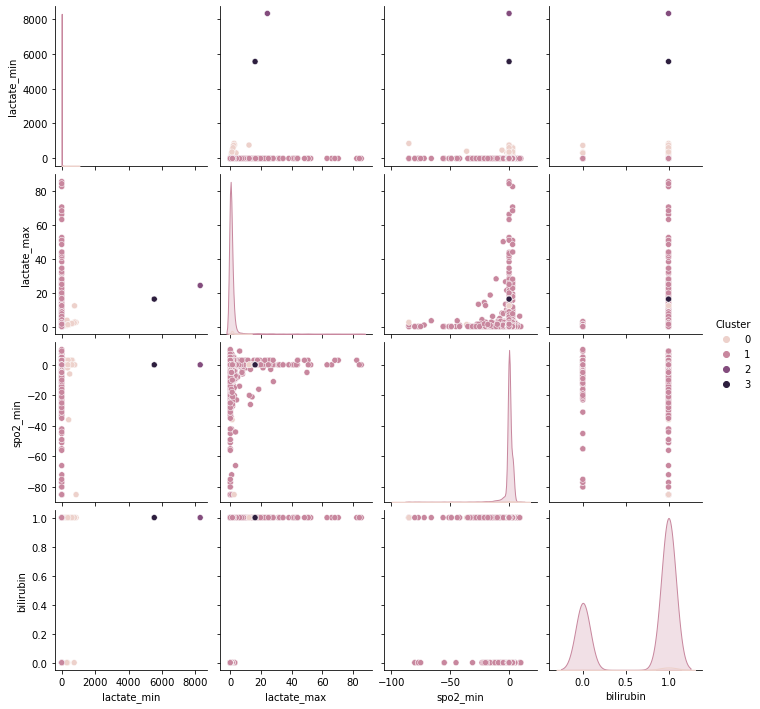

In [17]:
cols_to_plot = ['lactate_min', 'lactate_max', 'spo2_min', 'bilirubin', 'Cluster']
sns.pairplot(InterpKmeans1.loc[:, cols_to_plot],hue='Cluster')

Are lactate/spo2 values being scaled correctly? Appear to be of higher magnitude then other features.

In [43]:
means = InterpKmeans1.groupby(['Cluster']).mean()
means.to_csv(f"../data/cohort_cluster_means_{k}_kmeansjh.csv")
to_visualise = ['lactate_min', 'lactate_max', 'spo2_min', 'bilirubin']
means.loc[:, to_visualise]

lactate_min  lactate_max  spo2_min  bilirubin
Cluster                                               
0         395.684435     1.371370 -1.119403   0.940299
1           0.367526     1.028894 -0.441144   0.693820
2        8291.142857    24.143154  0.000000   1.000000
3        5541.142857    16.132335  0.000000   1.000000

Seems evident that lactate_min/max are very high in magnitude compared to other important features. Is this maintained in the non-scaled data?

In [71]:
#read in non scaled data
nonscaled = pd.read_csv("../data/cohort_features_v2_full_cohort.csv", index_col="ID")
nonscaledmeans = nonscaled.describe()
to_visualise = ['lactate_min', 'lactate_max', 'spo2_min', 'bilirubin']
nonscaledmeans.loc[:, to_visualise]

lactate_min   lactate_max     spo2_min    bilirubin
count  9480.000000   9480.000000  9480.000000  9480.000000
mean      7.123108    176.696065    84.739684     0.576160
std      84.406009    808.569078     5.606332     0.494192
min       0.000000      0.000000     0.000000     0.000000
25%       1.000000      1.800000    85.000000     0.000000
50%       1.300000      3.000000    85.000000     1.000000
75%       1.700000    193.000000    85.000000     1.000000
max    5805.000000  20500.000000    96.000000     1.000000

Im not certain how robustscaler works, but does it appear that the lactate values are skewing our data? are these non-scaled values within a normal range?

## Finding mean/median for LOS bins

In [103]:
#read in data to be binned - in this case, ive used all unscaled data. 
data = pd.read_csv("../data/cohort_features_v2_full_cohort.csv", index_col="ID")
data.groupby(['n_stays']).count()

anchor_age  suspected_infection  weight  height_chart  \
n_stays                                                          
1              7738                 7738    7738          7738   
2              1476                 1476    1476          1476   
3               205                  205     205           205   
4                48                   48      48            48   
5                11                   11      11            11   
7                 2                    2       2             2   

         heart_rate_min  heart_rate_max  temperature_min  temperature_max  \
n_stays                                                                     
1                  7738            7738             7738             7738   
2                  1476            1476             1476             1476   
3                   205             205              205              205   
4                    48              48               48               48   
5                    11              11               11               11   
7                     2               2                2                2   

         nbpm_min  nbpm_max  ...  dopamine  epinephrine  norepinephrine  \
n_stays                      ...                                          
1            7738      7738  ...      7738         7738            7738   
2            1476      1476  ...      1476         1476            1476   
3             205       205  ...       205          205             205   
4              48        48  ...        48           48              48   
5              11        11  ...        11           11              11   
7               2         2  ...         2            2               2   

         phenylephrine  vasopressin  dobutamine  milrinone  albumin  \
n_stays                                                               
1                 7738         7738        7738       7738     7738   
2                 1476         1476        1476       1476     1476   
3                  205          205         205        205      205   
4                   48           48          48         48       48   
5                   11           11          11         11       11   
7                    2            2           2          2        2   

         bilirubin  abps  
n_stays                   
1             7738  7738  
2             1476  1476  
3              205   205  
4               48    48  
5               11    11  
7                2     2  

[6 rows x 68 columns]

In [105]:
bins = data.copy()
bins.loc[bins['n_stays'] < 3.3,'n_stays'] = int(0) #under 3.3 stays
bins.loc[bins['n_stays'] >= 3.3,'n_stays'] = int(1) #over or equal to 3.3 stays

bins.groupby(['n_stays']).count()


anchor_age  suspected_infection  weight  height_chart  \
n_stays                                                          
0              9419                 9419    9419          9419   
1                61                   61      61            61   

         heart_rate_min  heart_rate_max  temperature_min  temperature_max  \
n_stays                                                                     
0                  9419            9419             9419             9419   
1                    61              61               61               61   

         nbpm_min  nbpm_max  ...  dopamine  epinephrine  norepinephrine  \
n_stays                      ...                                          
0            9419      9419  ...      9419         9419            9419   
1              61        61  ...        61           61              61   

         phenylephrine  vasopressin  dobutamine  milrinone  albumin  \
n_stays                                                               
0                 9419         9419        9419       9419     9419   
1                   61           61          61         61       61   

         bilirubin  abps  
n_stays                   
0             9419  9419  
1               61    61  

[2 rows x 68 columns]

Find mean/median for features of importance.

In [111]:
features = ['lactate_min', 'lactate_max', 'spo2_min', 'bilirubin', 'n_stays']
bins.loc[:, features].groupby(['n_stays']).mean()

lactate_min  lactate_max   spo2_min  bilirubin
n_stays                                                
0           7.162975   177.604544  84.748933   0.573628
1           0.967213    36.418033  83.311475   0.967213

In [112]:
bins.loc[:, features].groupby(['n_stays']).median()

lactate_min  lactate_max  spo2_min  bilirubin
n_stays                                               
0                1.3          3.0      85.0        1.0
1                0.9          1.3      85.0        1.0